In [1]:
import os
from os import path

import json

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('dataframe_dropped.pkl')

In [3]:
from sklearn.manifold import TSNE

conditions = df['condition']

columns = [col for col in df.columns if 'condition' not in col and 'replicate' not in col]
df = df[columns]


# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df)

# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [4]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition
0,-30.950144,31.281384,high_3
1,22.627594,12.086517,high_3
2,15.640702,4.525615,high_3
3,33.834530,17.234859,high_3
4,12.505976,-24.468960,high_3
...,...,...,...
2331,-34.981796,-24.461748,control_2
2332,14.663407,14.271878,control_2
2333,18.290154,7.215680,control_2
2334,10.410638,-6.656548,control_2


In [5]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)

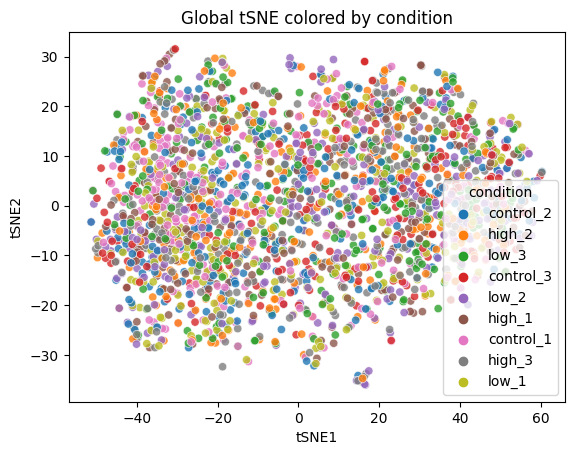

In [6]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by condition')
plt.show()

In [7]:
df = pd.read_pickle('dataframe_dropped.pkl')
df[['condition', 'replicate']] = df['condition'].str.split('_', expand=True)

In [8]:

conditions = df['condition']
replicate = df['replicate']

columns = [col for col in df.columns if 'condition' not in col and 'replicate' not in col]

df = df[columns]


In [9]:
from sklearn.manifold import TSNE

# Create and fit t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_representation = tsne.fit_transform(df)
# Create DataFrame from t-SNE-transformed data
transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])


In [10]:
transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), conditions.reset_index(drop=True), replicate.reset_index(drop=True)], axis=1, ignore_index=False)
transformed_data_labeled

,Component 1,Component 2,condition,replicate
0,-30.950144,31.281384,high,3
1,22.627594,12.086517,high,3
2,15.640702,4.525615,high,3
3,33.834530,17.234859,high,3
4,12.505976,-24.468960,high,3
...,...,...,...,...
2331,-34.981796,-24.461748,control,2
2332,14.663407,14.271878,control,2
2333,18.290154,7.215680,control,2
2334,10.410638,-6.656548,control,2


In [11]:
transformed_data_labeled = transformed_data_labeled[transformed_data_labeled['condition'] != 'low']

In [12]:
shuffled_df = transformed_data_labeled.sample(frac=1).reset_index(drop=True)

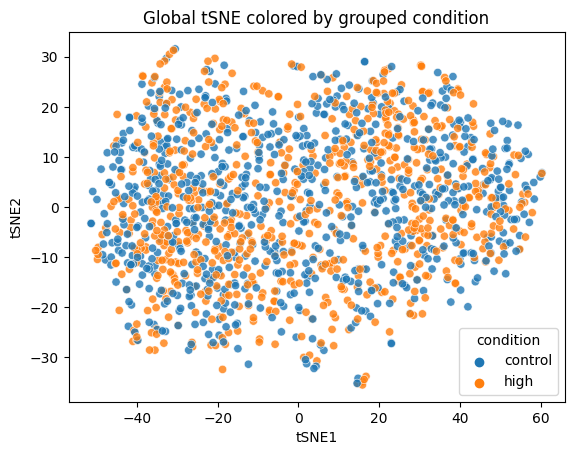

In [13]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='condition', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by grouped condition')
plt.show()

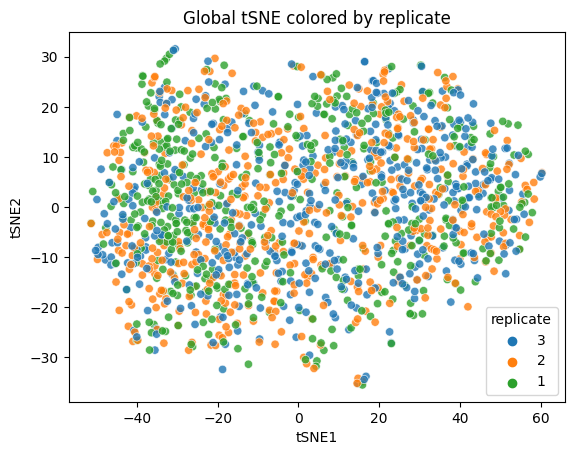

In [14]:
sns.scatterplot(data = shuffled_df, x = 'Component 1', y = 'Component 2', hue='replicate', alpha = 0.8)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.title('Global tSNE colored by replicate')
plt.show()

In [15]:
def plot_cluster_check_for_condition(df):
    from sklearn.manifold import TSNE
    df = df.groupby('condition')
    dfs = {}
    for condition in df.groups.keys():
        df_condition = df.get_group(condition)
        
        replicates = df_condition['replicate']
        
        columns = [col for col in df_condition.columns if ('condition' not in col and 'replicate' not in col)]
        
        df_condition = df_condition[columns]

        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(df_condition)
        transformed_data = pd.DataFrame(tsne_representation, columns=['Component 1', 'Component 2'])

        transformed_data_labeled = pd.concat([transformed_data.reset_index(drop=True), replicates.reset_index(drop=True)], axis=1, ignore_index=False)
        sns.scatterplot(data = transformed_data_labeled, x = 'Component 1', y = 'Component 2', hue='replicate')
        plt.xlabel('tSNE1')
        plt.ylabel('tSNE2')
        plt.title(condition)
        plt.show()

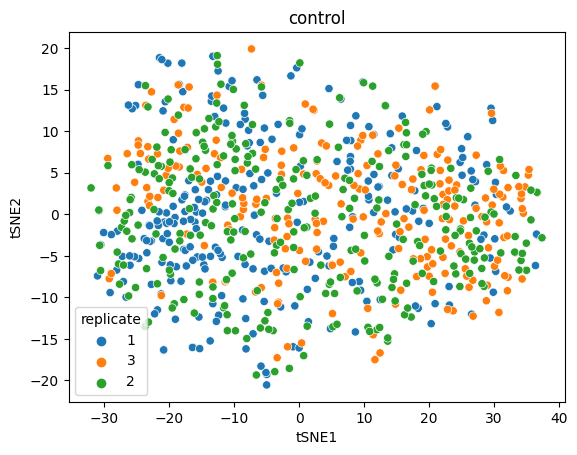

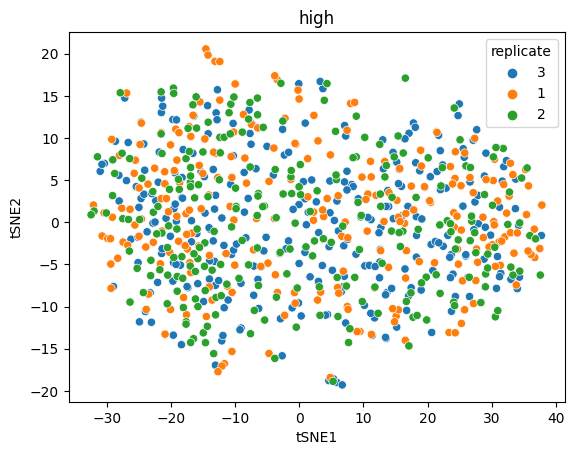

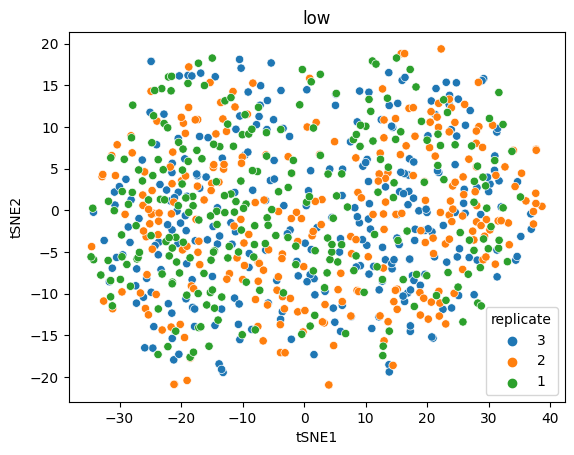

In [16]:
df = pd.read_pickle('dataframe_dropped.pkl')
df[['condition', 'replicate']] = df['condition'].str.split('_', expand=True)
plot_cluster_check_for_condition(df)